# COVID-19 Time Series CSV Analysis MN

In [73]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

import urllib.request

from datetime import date, datetime, timedelta

#See:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

cases = []

#The valid CSV formats started on 03-22-2020
#numdays = (date.today() - datetime.strptime('03-21-2020', "%m-%d-%Y").date()).days
numdays = (date.today() - datetime.strptime('03-01-2020', "%m-%d-%Y").date()).days
base = date.today()
date_list = [base - timedelta(days=x) for x in range(numdays)]
dates = []
for d in reversed(date_list):
    dates.append(d.strftime("%m-%d-%Y"))

del dates[-1]

for d in dates:
    data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/' + d + '.csv'
    urllib.request.urlretrieve(data_url,'Documents/daily_reports_19-covid-Confirmed.csv')
    time_series_file = "Documents/daily_reports_19-covid-Confirmed.csv"
    df = pd.read_csv(time_series_file)
    #print(df.columns)
    if 'Province_State' in df.columns:
        cases.append(df.loc[df['Province_State'] == 'Minnesota', 'Confirmed'].sum())
    if 'Province/State' in df.columns:
        cases.append(df.loc[df['Province/State'] == 'Minnesota', 'Confirmed'].sum())


In [74]:
#dates = ['3/1/2020','3/2/2020','3/3/2020','3/4/2020','3/5/2020','3/6/2020','3/7/2020','3/8/2020','3/9/2020','3/10/2020','3/11/2020','3/12/2020','3/13/2020','3/14/2020','3/15/2020','3/16/2020','3/17/2020','3/18/2020','3/19/2020','3/20/2020','3/21/2020','3/22/2020','3/23/2020','3/24/2020','3/25/2020']
#cases = [0,0,0,0,0,1,1,2,2,3,5,9,14,21,35,54,60,76,89,115,137,169,235,262,287]

print(dates,cases)


['03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '03-13-2020', '03-14-2020', '03-15-2020', '03-16-2020', '03-17-2020', '03-18-2020', '03-19-2020', '03-20-2020', '03-21-2020', '03-22-2020', '03-23-2020', '03-24-2020', '03-25-2020', '03-26-2020', '03-27-2020', '03-28-2020', '03-29-2020'] [0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 9, 14, 21, 35, 54, 60, 77, 89, 115, 138, 167, 234, 261, 286, 344, 396, 441, 503]


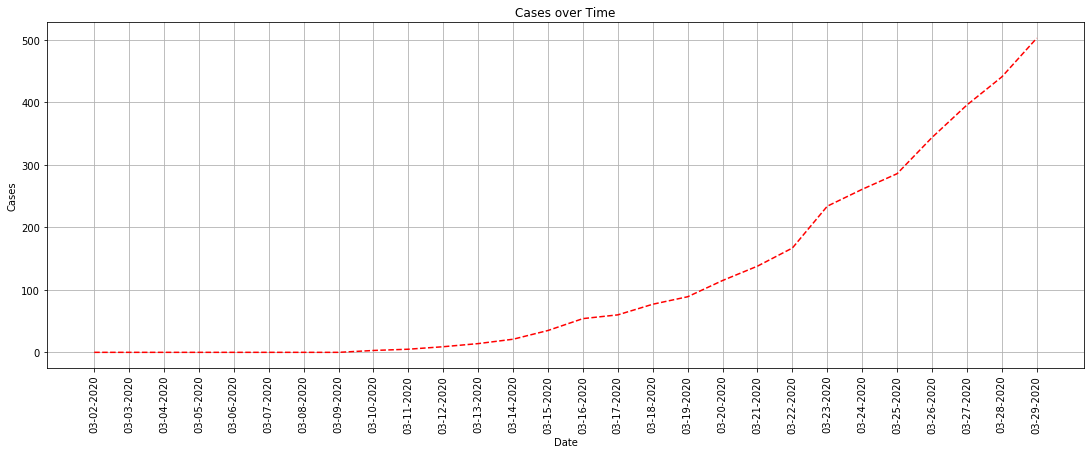

In [75]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0,0,0.8,0.8])

axes.plot(dates, cases, 'r--') # Create line plot with red dashed line
plt.title('Cases over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [76]:
datetimes = [pd.to_datetime(date, infer_datetime_format=True).dayofyear for date in dates]
print(datetimes)

[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [77]:
x = np.array(datetimes)
y = np.array(cases)
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

#print(x,y)

In [78]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_trainp, x_testp, y_trainp, y_testp = train_test_split(x, y, test_size=0.2, random_state=0)

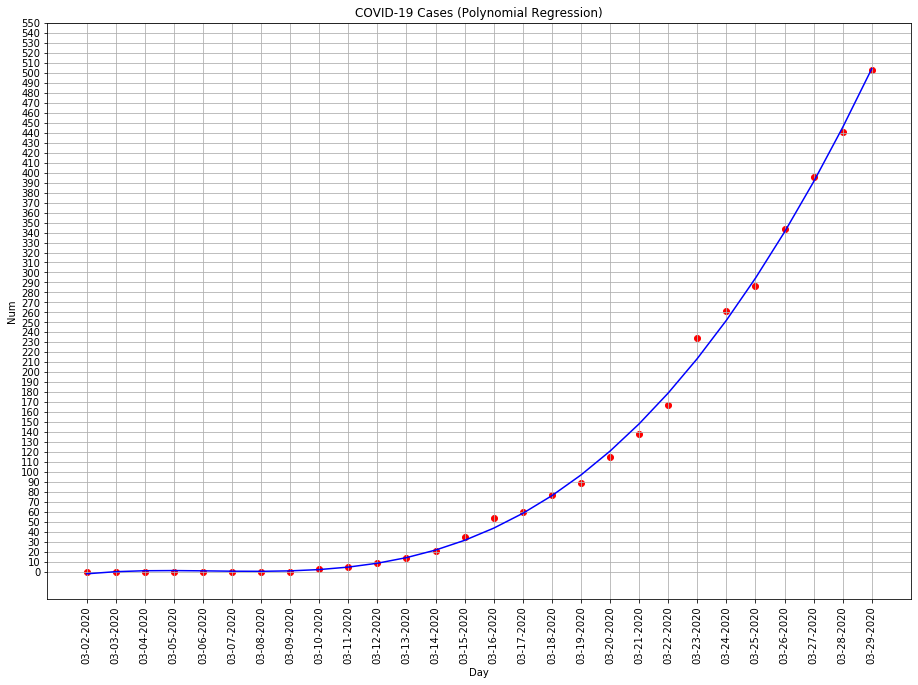

In [79]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(dates, y, color='red')
    axes.plot(dates, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    #axes.ticklabel_format(useOffset=False, style='plain')    
    plt.title('COVID-19 Cases (Polynomial Regression)')
    plt.xlabel('Day')
    plt.ylabel('Num')
    axes.set_yticks(np.arange(0, cases[-1] + 50, 10))
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()
    return
viz_polymonial()

In [80]:
# Polymonial Regression Prediction
april_6 = pd.to_datetime('04/06/2020', infer_datetime_format=True).dayofyear
prediction_april_6 = pol_reg.predict(poly_reg.fit_transform([[april_6]]))
print("Prediction April 6th: {0:,}".format(int(prediction_april_6[0,0])))

Prediction April 6th: 1,130


In [81]:
# Polymonial Regression Prediction
april_27 = pd.to_datetime('04/27/2020', infer_datetime_format=True).dayofyear
prediction_april_27 = pol_reg.predict(poly_reg.fit_transform([[april_27]]))
print("Prediction April 27th: {0:,}".format(int(prediction_april_27[0,0])))

Prediction April 27th: 3,876


In [82]:
# Polymonial Regression Prediction
jun_01 = pd.to_datetime('06/01/2020', infer_datetime_format=True).dayofyear
prediction_jun_01 = pol_reg.predict(poly_reg.fit_transform([[jun_01]]))
print("Prediction June 1st:  {0:,}".format(int(prediction_jun_01[0,0])))

Prediction June 1st:  6,163


In [107]:
import datetime

#Add more days and predictions per day to the arrays and plot display
casesfuture = cases[:]
datetimesfuture = datetimes[:]
datesfuture = [pd.to_datetime(date, infer_datetime_format=True) for date in dates]
nowstart = datesfuture[-1].strftime("%m/%d/%Y")
nowend = (datesfuture[-1] + datetime.timedelta(days=1)).strftime("%m/%d/%Y")

for dayofyear in range(datetimes[-1] + 1, datetimes[-1] + 90):
    datetimesfuture.append(dayofyear)
    datesfuture.append(datesfuture[-1] + datetime.timedelta(days=1)) 
    numpredict = pol_reg.predict(poly_reg.fit_transform([[dayofyear]])).item(0,0)
    casesfuture = np.append(casesfuture, numpredict)   
    if numpredict <= 0.0:
        break
        #numpredict = 0.0

# Convert all datetimes to strings for xlabel
datesfuture[:] = [date.strftime("%m/%d/%Y") for date in datesfuture]
    
print(datesfuture, datetimesfuture, casesfuture)

['03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020', '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020', '04/25/2020', '04/26/2020', '04/27/2020', '04/28/2020', '04/29/2020', '04/30/2020', '05/01/2020', '05/02/2020', '05/03/2020', '05/04/2020', '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020', '05/10/2020', '05/11/2020', '05/1

In [108]:
xfd = np.array(datesfuture)
xfd = xfd.reshape(len(xfd),1)
xf = np.array(datetimesfuture)
yf = np.array(casesfuture)
xf = xf.reshape(len(xf),1)
yf = yf.reshape(len(yf),1)

In [109]:
# Splitting the dataset into the Training set and Test set
xf_trainp, xf_testp, yf_trainp, yf_testp = train_test_split(xf, yf, test_size=0.2, random_state=0)

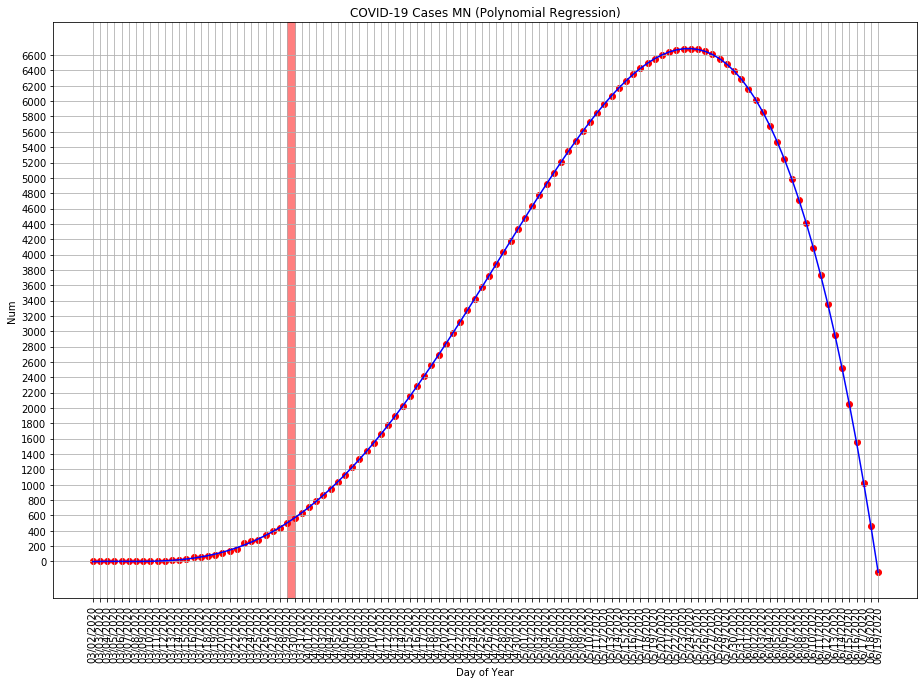

In [110]:
# Fitting Polynomial Regression to the dataset
poly_regf = PolynomialFeatures(degree=4)
x_polyf = poly_regf.fit_transform(xf)
pol_regf = LinearRegression()
pol_regf.fit(x_polyf, yf)

# Visualizing the Polymonial Regression results
def vizf_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(datesfuture, yf, color='red')
    axes.plot(datesfuture, pol_regf.predict(poly_regf.fit_transform(xf)), color='blue')
    #axes.ticklabel_format(useOffset=False, style='plain')
    plt.title('COVID-19 Cases MN (Polynomial Regression)')
    plt.xlabel('Day of Year')
    plt.ylabel('Num')
    axes.set_yticks(np.arange(0, max(casesfuture) + 100, 200))
    plt.grid()
    plt.xticks(rotation=90)
    plt.axvspan(nowstart, nowend, color='red', alpha=0.5)
    plt.show()
    return
vizf_polymonial()